In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def show_image(img):
    image = img.reshape((28, 28))
    plt.imshow(image, 'gray')


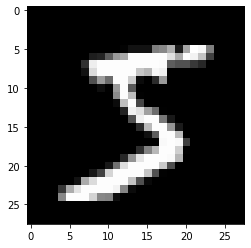

In [3]:
# initial
train_images_file = open('./data/train-images-idx3-ubyte', 'rb')
train_images_file.seek(4)
num_of_train_images = int.from_bytes(train_images_file.read(4), 'big')
train_images_file.seek(16)

train_labels_file = open('data/train-labels-idx1-ubyte', 'rb')
train_labels_file.seek(8)

train_set = []
for n in range(num_of_train_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i, 0] = int.from_bytes(train_images_file.read(1), 'big') / 256

    label_value = int.from_bytes(train_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1

    train_set.append((image, label))

# Reading The Test Set
test_images_file = open('data/t10k-images-idx3-ubyte', 'rb')
test_images_file.seek(4)

test_labels_file = open('data/t10k-labels-idx1-ubyte', 'rb')
test_labels_file.seek(8)

num_of_test_images = int.from_bytes(test_images_file.read(4), 'big')
test_images_file.seek(16)

test_set = []
for n in range(num_of_test_images):
    image = np.zeros((784, 1))
    for i in range(784):
        image[i] = int.from_bytes(test_images_file.read(1), 'big') / 256

    label_value = int.from_bytes(test_labels_file.read(1), 'big')
    label = np.zeros((10, 1))
    label[label_value, 0] = 1

    test_set.append((image, label))

# Plotting an image
show_image(train_set[0][0])
plt.show()

input image number 2 


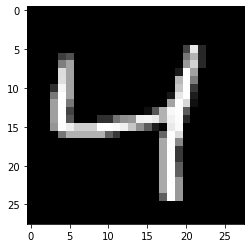

lable number 2
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [4]:
# check some images
print('input image number 2 ')
show_image(train_set[2][0])
plt.show()
print('lable number 2')
print(train_set[2][1])

In [5]:
print('INITIAL weights\n\n')
np.random.seed(3)
Wl1 = np.random.randn(16, 784)
Wl2 = np.random.randn(16, 16)
Wl3 = np.random.randn(10, 16)
print(Wl1.shape)

B1 = np.zeros((16, 1))
B2 = np.zeros((16, 1))
B3 = np.zeros((10, 1))

print(B3)
# def forward()

INITIAL weights


(16, 784)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [6]:
arr = np.array([[1, 2, 3]])


def sigmoid(arr):
    return 1 / (np.exp(-arr) + 1)


def sigmoid_prime(arr):
    return sigmoid(arr) * (1 - sigmoid(arr))


print(sigmoid(arr))

[[0.73105858 0.88079708 0.95257413]]


In [7]:
print('test')
arr = np.array([[1, 2, 3],
                [1, 1, 1]])

arr2 = np.array([[1, 2, 3]])
print(arr.T.shape)
print(arr2.shape)
print(arr2.dot(arr.T))


test
(3, 2)
(1, 3)
[[14  6]]


FORWARD 
W1 (16, 784)
W2 (16, 16)
W3 (10, 16)


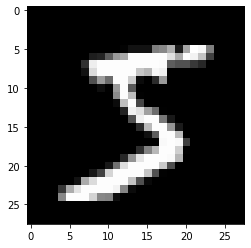

[[9.99918540e-01]
 [3.29955725e-04]
 [6.35943023e-01]
 [6.90229770e-05]
 [4.24869196e-03]
 [1.44882314e-01]
 [8.83883290e-01]
 [7.00589366e-01]
 [4.02834634e-01]
 [9.99999997e-01]
 [1.14434005e-01]
 [9.99969717e-01]
 [7.36502408e-03]
 [2.47762964e-02]
 [7.36593499e-05]
 [2.95321539e-01]]
[[0.10776108]
 [0.24945602]
 [0.44568694]
 [0.69112612]
 [0.10273681]
 [0.14837483]
 [0.96371483]
 [0.16922941]
 [0.28820779]
 [0.57300017]]


In [8]:
print('FORWARD ')
print('W1', Wl1.shape)
print('W2', Wl2.shape)
print('W3', Wl3.shape)


def forward(input_layer, Wl1, Wl2, Wl3, B1, B2, B3):
    Z1 = Wl1 @ input_layer + B1
    A1 = sigmoid(Z1)
    Z2 = Wl2 @ A1 + B2
    A2 = sigmoid(Z2)
    Z3 = Wl3 @ A2 + B3
    A3 = sigmoid(Z3)
    return A1, A2, A3, Z1, Z2, Z3


show_image(train_set[0][0])
plt.show()
A1, A2, A3, Z1, Z2, Z3 = forward(train_set[1][0], Wl1, Wl2, Wl3, B1, B2, B3)
print(A1)
print(A3)
# print('input ', train_set[3][0])
# print('predict',x)

In [9]:
correct_count = 0
for i in range(1000):
    A1, A2, A3, Z1, Z2, Z3 = forward(train_set[i][0], Wl1, Wl2, Wl3, B1, B2, B3)
    # print(res)
    predict = np.argmax(A3)
    label = np.argmax(train_set[i][1])
    print('prediction= ', predict)
    print('label= ', label)
    if label == predict:
        correct_count += 1
print('accuracy', correct_count / 1000 * 100, '%')


prediction=  6
label=  5
prediction=  6
label=  0
prediction=  6
label=  4
prediction=  6
label=  1
prediction=  6
label=  9
prediction=  6
label=  2
prediction=  6
label=  1
prediction=  6
label=  3
prediction=  6
label=  1
prediction=  6
label=  4
prediction=  6
label=  3
prediction=  6
label=  5
prediction=  6
label=  3
prediction=  6
label=  6
prediction=  6
label=  1
prediction=  6
label=  7
prediction=  6
label=  2
prediction=  6
label=  8
prediction=  6
label=  6
prediction=  6
label=  9
prediction=  6
label=  4
prediction=  6
label=  0
prediction=  6
label=  9
prediction=  6
label=  1
prediction=  6
label=  1
prediction=  6
label=  2
prediction=  6
label=  4
prediction=  6
label=  3
prediction=  6
label=  2
prediction=  6
label=  7
prediction=  6
label=  3
prediction=  6
label=  8
prediction=  6
label=  6
prediction=  6
label=  9
prediction=  6
label=  0
prediction=  6
label=  5
prediction=  6
label=  6
prediction=  6
label=  0
prediction=  6
label=  7
prediction=  6
label=  6


In [10]:
def backpropagation(A1, A2, A3, Z1, Z2, Z3, W2, W3, input_layer, label):
    grad_A3 = 2 * (A3 - label)

    grad_b3 = 2 * sigmoid_prime(Z3) * (A3 - label)
    grad_Wl3 = (2 * sigmoid_prime(Z3) * (A3 - label)) @ A2.T
    grad_A2 = W3.T @ (2 * sigmoid_prime(Z3) * (A3 - label))

    grad_b2 = grad_A2* sigmoid_prime(Z2)
    grad_Wl2 = (grad_A2 * sigmoid_prime(Z2)) @ A1.T
    grad_A1 = W2.T @ (sigmoid_prime(Z2) * grad_A2)

    grad_b1 = grad_A1* sigmoid_prime(Z1)
    grad_Wl1 = (grad_A1 * sigmoid_prime(Z1)) @ input_layer.T

    return grad_Wl1, grad_Wl2, grad_Wl3, grad_b1, grad_b2, grad_b3





In [11]:
A1, A2, A3, Z1, Z2, Z3 = forward(train_set[3][0], Wl1, Wl2, Wl3, B1, B2, B3)
grad_Wl1, grad_Wl2, grad_Wl3, grad_b1, grad_b2, grad_b3 = backpropagation(A1, A2, A3, Z1, Z2, Z3,
                                                                          Wl2, Wl3, train_set[3][0], train_set[3][1])

print(grad_b1[2])

[0.00026976]


In [12]:
x = np.array([1, 2, 3])

In [13]:
def model(input_data, batch, epoc, learning_rate):
    m = len(input_data)
    np.random.seed(100)
    Wl1 = np.random.randn(16, 784)
    Wl2 = np.random.randn(16, 16)
    Wl3 = np.random.randn(10, 16)

    B1 = np.zeros((16, 1))
    B2 = np.zeros((16, 1))
    B3 = np.zeros((10, 1))

    cost_list = []
    for i in range(epoc):
        sum_cost = 0
        for j in range(m):
            if j % batch == 0:
                batch_list = input_data[j - batch:j]
                grad_Wl1 = grad_Wl2 = grad_Wl3 = 0
                grad_b1 = grad_b2 = grad_b3 = 0

                for item in batch_list:
                    y = item[1]
                    A1, A2, A3, Z1, Z2, Z3 = forward(item[0], Wl1, Wl2, Wl3, B1, B2, B3)
                    cost = np.sum((A3 - y) @ (A3 - y).T)
                    sum_cost += cost

                    g_Wl1, g_Wl2, g_Wl3, g_b1, g_b2, g_b3 = backpropagation(A1, A2, A3, Z1, Z2, Z3,
                                                                            Wl2, Wl3, item[0], y)
                    grad_Wl1 += g_Wl1
                    grad_Wl2 += g_Wl2
                    grad_Wl3 += g_Wl3
                    grad_b1 += g_b1
                    grad_b2 += g_b2
                    grad_b3 += g_b3
                Wl1 = Wl1 - learning_rate * grad_Wl1/batch
                Wl2 = Wl2 - learning_rate * grad_Wl2/batch
                Wl3 = Wl3 - learning_rate * grad_Wl3/batch
                B1 = B1 - learning_rate * grad_b1/batch
                B2 = B2 - learning_rate * grad_b2/batch
                B3 = B3 - learning_rate * grad_b3/batch
        avg_cost = sum_cost / m
        print(avg_cost)
        cost_list.append(avg_cost)
    return Wl1, Wl2, Wl3, B1, B2, B3, cost_list


0.04314895744598758
0.01905923660731691
0.016736155752909102
0.015799498235410304
0.01516743121090927
0.014675284033345774
0.014478161617107528
0.014042097148608896
0.014227587305517122
0.013875221998525845
0.013782960310726471
0.013534058370234692
0.013446475435845382
0.013270078379016559
0.0129798946924366
0.012567114115514394
0.012746845648614101
0.01227949767735338
0.012341019281701934
0.012140648475670427


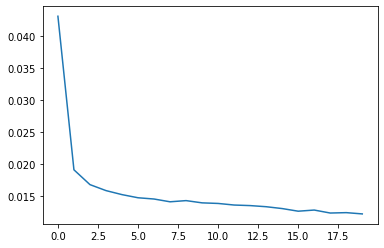

In [23]:
Wl1, Wl2, Wl3, B1, B2, B3, cost_list = model(train_set, 10, 20, learning_rate=0.6)
cost_list = np.squeeze(cost_list)
plt.plot(cost_list)

### همانطور ک در شکل میبینیم تابع خطا در نهایت در حال کم شدن است با ولی دارای نوسان است آن هم به دلیل استفاده از

mini batch gradiant

است و هر چی سایز

batch

کمتر باشد این نوسان بیشتر خواهد بود شکل پایینی خواهیم دید

In [19]:

# print(Wl1, Wl2, Wl3, B1, B2, B3)
correct_count = 0
for i in range(len(train_set)):
    A1, A2, A3, Z1, Z2, Z3 = forward(train_set[i][0], Wl1, Wl2, Wl3, B1, B2, B3)
    # print(res)
    predict = np.argmax(A3)
    label = np.argmax(train_set[i][1])
    if label == predict:
        correct_count += 1
print('accuracy', correct_count / len(train_set) * 100, '%')

accuracy 96.61 %


### در اینجا ما مدل را آموزش داده و روی مجموعه ترین درصد خطا را بدست آورده ایم



In [20]:
correct_count = 0
for i in range(len(test_set)):
    A1, A2, A3, Z1, Z2, Z3 = forward(test_set[i][0], Wl1, Wl2, Wl3, B1, B2, B3)
    # print(res)
    predict = np.argmax(A3)
    label = np.argmax(test_set[i][1])
    if label == predict:
        correct_count += 1
print('accuracy', correct_count / len(test_set) * 100, '%')




accuracy 94.03 %


## a حال مدل آموزش داده شده را روی مجموعه تست  درصد خطا را بدست آورده ایم
۹۴٪

## Stochastic gradient descent
###### در این روش ما به جای استفاده از دسته ای از دیتا ها  وسپس آپدیت کردن وزن به ازای  هر دیتا اینکار را میکنیم از مزایای اینکار سرعت بخشیدن به مدل و کاهش ریداندنسی است اما مشکلی ک دارد لزوما به ازای هر دیتا میزان خطای ما یا همان تابع کاست کاهش پیدا نمیکند  ولی به مرور باید این اتفاق بی افتد ( برای دیباگ کردن مدل سخت تر است )
### در واقع این روش یه جورایی همان روش mini-batch  هست به ازای batch=1

0.04409830136563812
0.031526742320723146
0.028621051189424304
0.02497497375000877
0.025676799672903965
0.025450818495715278
0.02320756479928555
0.022559939739280308
0.024997397194637668
0.02294571080264554
0.02054793202127304
0.02230086246815344
0.021369754436881445
0.02018206382153125
0.021311671685944614
0.021276349520834018
0.019441400231547938
0.018299860102038976
0.01859706377748798


<ipython-input-6-892f3a09a809>:5: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp(-arr) + 1)


0.020020559096502154


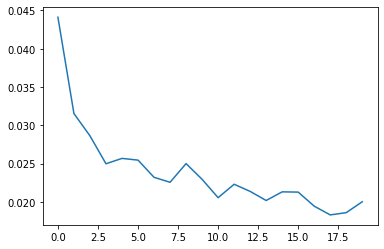

In [22]:
Wl1, Wl2, Wl3, B1, B2, B3, cost_list = model(train_set, 1, 20, learning_rate=0.6)
cost_list = np.squeeze(cost_list)
plt.plot(cost_list)

##   دلیل این نوسان همانطور ک گفته شد استفاده از  بچ سایز کم است


In [26]:
print('TRAIN_SET')

# print(Wl1, Wl2, Wl3, B1, B2, B3)
correct_count = 0
for i in range(len(train_set)):
    A1, A2, A3, Z1, Z2, Z3 = forward(train_set[i][0], Wl1, Wl2, Wl3, B1, B2, B3)
    # print(res)
    predict = np.argmax(A3)
    label = np.argmax(train_set[i][1])
    if label == predict:
        correct_count += 1
print('accuracy', correct_count / len(train_set) * 100, '%')

accuracy 94.89666666666666 %


In [27]:
print('TEST_SET')
correct_count = 0
for i in range(len(test_set)):
    A1, A2, A3, Z1, Z2, Z3 = forward(test_set[i][0], Wl1, Wl2, Wl3, B1, B2, B3)
    # print(res)
    predict = np.argmax(A3)
    label = np.argmax(test_set[i][1])
    if label == predict:
        correct_count += 1
print('accuracy', correct_count / len(test_set) * 100, '%')





TEST_SET
accuracy 93.52000000000001 %
